In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  os
PATH = '../data/'

In [2]:
os.listdir(PATH)

['genre_labels.csv', 'sample_submit.csv', 'test.csv', 'train.csv']

open files

In [3]:
train_df = pd.read_csv(PATH + 'train.csv')
print(train_df.shape)
train_df.head()

(4046, 14)


,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown


In [4]:
test_df = pd.read_csv(PATH + 'test.csv')
print(test_df.shape)
test_df.head()

(4046, 13)


,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,4046,43,192465,0.559812,0.565035,0.522237,-12.217087,0.620510,0.389727,0.214989,0.161924,77-96,region_I
1,4047,40,226536,0.134002,0.542547,0.493128,-2.612846,0.853089,0.163106,0.184183,0.155460,121-152,unknown
2,4048,58,215385,0.140537,0.643086,0.533189,-3.439684,0.834416,0.429304,0.167352,0.179191,121-152,region_K
3,4049,49,254494,0.266406,0.456733,0.410583,-10.830424,0.534261,0.151830,0.174403,0.186061,77-96,region_D
4,4050,50,230934,0.351907,0.526235,0.645625,-9.099337,0.612474,0.319161,0.157594,0.184142,97-120,region_E


In [5]:
genre_df = pd.read_csv(PATH + 'genre_labels.csv')
genre_df

,genre,labels
0,country,0
1,electronic,1
2,folk,2
3,hip-hop,3
4,jazz,4
5,latin,5
6,classic,6
7,other-light-music,7
8,pop,8
9,religious,9


In [6]:
sub_df = pd.read_csv(PATH + 'sample_submit.csv', header=None, names=['ID', 'Pred'])
sub_df.head()

,ID,Pred
0,4046,9
1,4047,8
2,4048,4
3,4049,2
4,4050,5


simple preprocess

In [7]:
split_tempo = lambda x: x.split('-')
train_df['tempo_min'] = train_df.tempo.apply(split_tempo).apply(lambda x: x[0]).astype(np.int64)
train_df['tempo_max'] = train_df.tempo.apply(split_tempo).apply(lambda x: x[1]).astype(np.int64)
test_df['tempo_min'] = test_df.tempo.apply(split_tempo).apply(lambda x: x[0]).astype(np.int64)
test_df['tempo_max'] = test_df.tempo.apply(split_tempo).apply(lambda x: x[1]).astype(np.int64)
train_df.tempo = train_df.tempo_max - train_df.tempo_min
test_df.tempo = test_df.tempo_max - train_df.tempo_min

description

In [8]:
train_df.dtypes

index                 int64
genre                 int64
popularity            int64
duration_ms           int64
acousticness        float64
positiveness        float64
danceability        float64
loudness            float64
energy              float64
liveness            float64
speechiness         float64
instrumentalness    float64
tempo                 int64
region               object
tempo_min             int64
tempo_max             int64
dtype: object

In [9]:
train_df.describe()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,tempo_min,tempo_max
count,4046.000000,4046.000000,4046.000000,4.046000e+03,4046.000000,4036.000000,4038.000000,4046.000000,4046.000000,4043.000000,4038.000000,4045.000000,4046.000000,4046.000000,4046.000000
mean,2022.500000,7.281760,41.056105,2.421410e+05,0.346455,0.464100,0.504347,-7.715659,0.603663,0.265986,0.198655,0.214336,24.391498,110.140633,134.532130
std,1168.123923,2.887542,16.165708,8.520241e+04,0.241004,0.225052,0.158415,4.109640,0.201020,0.155769,0.083557,0.154281,5.588304,28.525403,30.432382
min,0.000000,0.000000,0.000000,5.998000e+03,0.000000,0.000000,0.013839,-37.820457,0.003383,0.000000,0.000000,0.000000,5.000000,0.000000,40.000000
25%,1011.250000,7.000000,31.000000,2.044420e+05,0.149705,0.276384,0.392581,-9.775363,0.462137,0.168527,0.148698,0.143295,19.000000,97.000000,120.000000
50%,2022.500000,8.000000,42.000000,2.358735e+05,0.250711,0.450211,0.510993,-7.189460,0.634078,0.218486,0.183190,0.171708,23.000000,97.000000,120.000000
75%,3033.750000,10.000000,52.000000,2.724020e+05,0.523088,0.644786,0.617371,-4.876553,0.768768,0.317773,0.224999,0.205446,31.000000,121.000000,152.000000
max,4045.000000,10.000000,82.000000,2.135773e+06,1.000000,0.989661,1.000000,0.000000,1.000000,1.000000,0.886806,1.000000,40.000000,209.000000,220.000000


<AxesSubplot:>

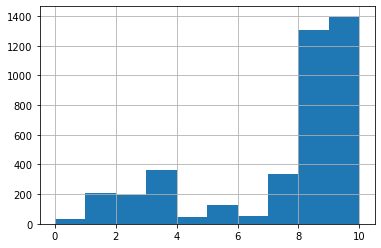

In [10]:
train_df.genre.hist(bins=10, range=(0, 10))

In [11]:
test_df.dtypes

index                 int64
popularity            int64
duration_ms           int64
acousticness        float64
positiveness        float64
danceability        float64
loudness            float64
energy              float64
liveness            float64
speechiness         float64
instrumentalness    float64
tempo                 int64
region               object
tempo_min             int64
tempo_max             int64
dtype: object

In [12]:
test_df.describe()

,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,tempo_min,tempo_max
count,4046.000000,4046.000000,4.046000e+03,4045.000000,4032.000000,4035.000000,4046.000000,4045.000000,4040.000000,4035.000000,4044.000000,4046.000000,4046.000000,4046.000000
mean,6068.500000,41.158181,2.418486e+05,0.335216,0.467855,0.499143,-7.636531,0.608755,0.268926,0.201776,0.216227,23.934009,109.867029,134.074642
std,1168.123923,16.107248,7.829733e+04,0.236284,0.220606,0.161413,3.989469,0.200665,0.157032,0.086553,0.156315,42.438588,29.073576,31.155091
min,4046.000000,0.000000,5.826000e+03,0.012727,0.014537,0.000000,-30.216122,0.000000,0.017454,0.016510,0.045321,-117.000000,0.000000,40.000000
25%,5057.250000,31.000000,2.019200e+05,0.145535,0.288579,0.388765,-9.768664,0.461840,0.168854,0.149764,0.144141,-1.000000,97.000000,120.000000
50%,6068.500000,42.000000,2.353070e+05,0.245121,0.446927,0.508350,-7.088928,0.636469,0.220989,0.186697,0.172429,23.000000,97.000000,120.000000
75%,7079.750000,52.000000,2.724925e+05,0.494312,0.641742,0.616642,-4.936082,0.774140,0.323248,0.229745,0.205682,55.000000,121.000000,152.000000
max,8091.000000,82.000000,1.105001e+06,0.985922,1.000000,0.948866,0.000000,0.991536,0.997364,1.000000,0.927823,192.000000,209.000000,220.000000


In [13]:
train_df.groupby('genre').describe()

index                                                            \
        count         mean          std   min      25%     50%      75%   
genre                                                                     
0        32.0  1965.937500  1335.689092  20.0   794.25  1836.0  3406.75   
1       205.0  2132.951220  1213.947021  24.0  1044.00  2173.0  3227.00   
2       191.0  1991.246073  1162.941107   9.0  1055.50  1922.0  3069.00   
3       362.0  2032.856354  1158.649142   2.0  1050.50  2025.5  2986.75   
4        45.0  1593.311111   956.094157  70.0   742.00  1650.0  2290.00   
5       126.0  1876.857143  1174.590766  29.0   917.25  1898.5  2961.25   
6        50.0  2074.520000  1204.379546  49.0  1313.00  1861.0  3188.25   
7       334.0  2098.733533  1153.850867   8.0  1094.75  2279.5  3044.25   
8      1305.0  2034.211494  1173.508758   1.0  1038.00  2000.0  3082.00   
9        59.0  2046.915254  1196.528878  45.0  1011.00  2214.0  3018.50   
10     1337.0  2003.252057  1160.556250   0.0   971.00  2013.0  2970.00   

              popularity             ... tempo_min        tempo_max  \
          max      count       mean  ...       75%    max     count   
genre                                ...                              
0      4026.0       32.0  62.375000  ...     121.0  193.0      32.0   
1      4020.0      205.0  41.039024  ...     121.0  177.0     205.0   
2      3988.0      191.0  38.617801  ...     121.0  193.0     191.0   
3      4045.0      362.0  47.400552  ...     121.0  209.0     362.0   
4      3712.0       45.0  48.822222  ...     121.0  209.0      45.0   
5      4042.0      126.0  35.777778  ...     121.0  177.0     126.0   
6      3997.0       50.0  41.940000  ...     121.0  193.0      50.0   
7      4038.0      334.0  40.215569  ...     121.0  193.0     334.0   
8      4039.0     1305.0  46.557854  ...     121.0  209.0    1305.0   
9      3926.0       59.0  69.305085  ...     121.0  193.0      59.0   
10     4044.0     1337.0  32.975318  ...     121.0  209.0    1337.0   

                                                                
             mean        std   min    25%    50%    75%    max  
genre                                                           
0      139.375000  30.260962  76.0  120.0  152.0  152.0  208.0  
1      139.409756  24.093118  63.0  120.0  152.0  152.0  192.0  
2      131.706806  32.043357  76.0   96.0  120.0  152.0  208.0  
3      122.696133  31.320724  76.0   96.0  120.0  152.0  220.0  
4      130.288889  35.590232  40.0   96.0  120.0  152.0  220.0  
5      134.682540  28.151490  63.0  120.0  120.0  152.0  192.0  
6      127.920000  33.275498  76.0   96.0  120.0  152.0  208.0  
7      131.161677  29.201447  40.0  120.0  120.0  152.0  208.0  
8      135.251341  29.249870  40.0  120.0  152.0  152.0  220.0  
9      135.186441  38.141513  76.0   96.0  120.0  152.0  208.0  
10     137.763650  30.926503  40.0  120.0  152.0  152.0  220.0  

[11 rows x 112 columns]

categorical features

In [14]:
train_df.region.unique()

array(['region_H', 'region_I', 'region_E', 'region_C', 'unknown',
       'region_N', 'region_O', 'region_B', 'region_K', 'region_L',
       'region_P', 'region_R', 'region_T', 'region_D', 'region_F',
       'region_J', 'region_S', 'region_G', 'region_Q', 'region_A',
       'region_M'], dtype=object)

In [15]:
test_df.region.unique()

array(['region_I', 'unknown', 'region_K', 'region_D', 'region_E',
       'region_H', 'region_S', 'region_Q', 'region_C', 'region_P',
       'region_B', 'region_T', 'region_F', 'region_L', 'region_J',
       'region_N', 'region_O', 'region_G', 'region_R', 'region_A'],
      dtype=object)